# DAV 6150 Module 13 Assignment Neural Networks

**SUBMITTED BY-**
- Prem Chand Jala
- Brunda Anantha
- Bhavya Kurupa Nagaraj

----------------------------------------------------------------

# 1. Introduction

In this assignment, our primary objective is to work with a dataset sourced from the UC Irvine machine learning archive, specifically focusing on predicting the number of times an online news article will be shared. This dataset consists of 39,797 observations and 61 attributes, with the "shares" variable serving as our response variable for a linear regression model.

Our journey to address this problem will be structured as follows:

**Data Loading:** We will start by loading the provided dataset (M4_Data.csv) into a Pandas dataframe from our GitHub repository. This step is crucial to set the foundation for our analysis.

Exploratory Data Analysis (EDA): Our next step involves diving deep into the dataset to understand the nature of each attribute. We will employ various statistical metrics and visualization techniques to gain insights into the data. This EDA will help us identify any relationships between explanatory variables and the response variable, along with any data anomalies. We aim to provide a thorough yet concise EDA report with meaningful insights.

Feature Selection and Dimensionality Reduction: Given that we have 60 candidate explanatory variables, we'll utilize our knowledge of feature selection and dimensionality reduction techniques to identify the most useful variables for our linear regression model. Our approach will be guided by the insights gained during the EDA. We will consider the trade-off between model performance and model simplification, ensuring that we make informed choices in the selection process. The methods we employ may include filtering methods, Principal Component Analysis (PCA), or stepwise search, among others. We will provide an explanatory narrative justifying our decisions in this process.

Regression Model Evaluation: With our selected features, we will construct a linear regression model and evaluate its performance. This step involves training and cross-validation to assess how well the model predicts the number of shares for online news articles. We will report on relevant performance metrics, potentially including Adjusted R^2 or other suitable measures.

Conclusions: Finally, we will summarize our findings and conclusions. This section will encapsulate the key takeaways from our analysis, including insights into which explanatory variables are most influential in predicting the number of shares for online news articles.

Throughout this assignment, we will ensure that our Jupyter Notebook is a professional-quality document, well-organized, and free of errors. We will include properly labeled graphics, clear formatting, and explanatory comments in our Python code cells. Our aim is to provide a comprehensive and insightful analysis that effectively addresses the problem of predicting online news article shares.






--------------------------------------------

# 2. Data Aquiring

In this assignment, our starting point is the retrieval of our dataset, which is conveniently hosted on a dedicated GitHub repository. The dataset is stored in a CSV file named "M4_Data.csv," and our first task is to load this data into a Pandas dataframe. This initial step is crucial as it provides the foundation for our subsequent exploration and analysis.

## 2.1 Importing Libraries

In the following code, we are importing several essential libraries to support our data analysis and visualization tasks. The libraries include pandas for efficient tabular data handling, plotly.express and matplotlib.pyplot for creating visualizations, seaborn for statistical visualizations, and numpy for numerical array operations. These libraries provide us with the necessary tools and functionalities to effectively analyze and visualize data.

In [1]:
# Importing necessary libraries for data manipulation and visualization

# Pandas for working with tabular data
import pandas as pd

# Matplotlib.pyplot for static plots
import matplotlib.pyplot as plt

# Seaborn for statistical visualizations
import seaborn as sns

# NumPy for numerical array operations
import numpy as np

# Scikit-learn for machine learning and data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


## 2.2 Loading Dataset from Github & Understanding the data

To begin working on this assignment, we need to load the provided dataset, which is the "Online News Popularity" dataset, into our GitHub repository. We will then access the raw link to the dataset to import it into a Jupyter Notebook using a Pandas DataFrame.

- Upload the Online News Popularity Dataset to GitHub:

First, ensure that the "Online News Popularity" dataset is uploaded to a GitHub repository in a compatible format, such as CSV. This can be done by one of the team members or collaboratively, depending on wer group's preferred workflow.

- Access the Raw Link:

Obtain the raw link for the uploaded dataset on GitHub. This link will allow us to fetch the data directly in our Jupyter Notebook. Make sure the link is accessible to everyone in wer team.

- Load Data with Pandas:

Utilize the Pandas library within the Jupyter Notebook to read the dataset from the raw GitHub link and create a Pandas DataFrame. This step will involve using the read_csv() function from Pandas.


In [2]:
# Using the read_csv() function to read the news dataset from the provided raw GitHub link.
# The link points to the CSV file containing the data.
news_df = pd.read_csv("https://raw.githubusercontent.com/KURUBANAGARAJ/DAV-6150/main/M4_Data.csv")
# Displaying the news dataset by assigning it to the 'news_df' DataFrame.
news_df


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


----------------------------------------------------------------

# 3. Break down of Variables

In [3]:
# Extracting the column names from the news dataset using the .columns attribute.
column_names = news_df.columns

# Printing the list of column names to the console.
print(column_names)


Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

Here's an overview of the attributes in our news dataset:

url: The URL of the online news article.

timedelta: The number of days between the publication of the article and the dataset acquisition date.

n_tokens_title: The number of words in the article's title.

n_tokens_content: The number of words in the article's content.

n_unique_tokens: The ratio of unique words to the total number of words in the content.

n_non_stop_words: The ratio of non-stop words to the total number of words in the content.

n_non_stop_unique_tokens: The ratio of unique non-stop words to the total number of words in the content.

num_hrefs: The number of links (hyperlinks) in the article.

num_self_hrefs: The number of links to other articles published by the same source.

num_imgs: The number of images in the article.

num_videos: The number of videos in the article.

average_token_length: The average length of words in the content.

num_keywords: The number of keywords in the metadata.

data_channel_is_lifestyle: Binary indicator of whether the article is in the lifestyle data channel.

data_channel_is_entertainment: Binary indicator of whether the article is in the entertainment data channel.

data_channel_is_bus: Binary indicator of whether the article is in the business data channel.

data_channel_is_socmed: Binary indicator of whether the article is in the social media data channel.

data_channel_is_tech: Binary indicator of whether the article is in the tech data channel.

data_channel_is_world: Binary indicator of whether the article is in the world news data channel.

kw_min_min: Minimum number of shares of the worst keyword.

kw_max_min: Maximum number of shares of the worst keyword.

kw_avg_min: Average number of shares of the worst keyword.

kw_min_max: Minimum number of shares of the best keyword.

kw_max_max: Maximum number of shares of the best keyword.

kw_avg_max: Average number of shares of the best keyword.

kw_min_avg: Minimum number of shares of all keywords.

kw_max_avg: Maximum number of shares of all keywords.

kw_avg_avg: Average number of shares of all keywords.

self_reference_min_shares: Minimum number of shares in articles referencing itself.

self_reference_max_shares: Maximum number of shares in articles referencing itself.

self_reference_avg_shares: Average number of shares in articles referencing itself.

weekday_is_monday to weekday_is_sunday: Binary indicators for each weekday, showing whether the article was published on that day.

is_weekend: Binary indicator of whether the article was published on a weekend.

LDA_00 to LDA_04: Latent Dirichlet Allocation (LDA) topics extracted from the content.

global_subjectivity: A measure of the article's subjectivity.

global_sentiment_polarity: A measure of the article's sentiment polarity.

global_rate_positive_words: Rate of positive words in the content.

global_rate_negative_words: Rate of negative words in the content.

rate_positive_words: Rate of positive words among non-neutral tokens.

rate_negative_words: Rate of negative words among non-neutral tokens.

avg_positive_polarity: Average polarity of positive words.

min_positive_polarity: Minimum polarity of positive words.

max_positive_polarity: Maximum polarity of positive words.

avg_negative_polarity: Average polarity of negative words.

min_negative_polarity: Minimum polarity of negative words.

max_negative_polarity: Maximum polarity of negative words.

title_subjectivity: Subjectivity of the article's title.

title_sentiment_polarity: Sentiment polarity of the article's title.

abs_title_subjectivity: Absolute subjectivity of the article's title.

abs_title_sentiment_polarity: Absolute sentiment polarity of the article's title.

shares: The number of times the online news article was shared.

These attributes provide a wide range of information about online news articles, including their content, metadata, and various textual and sentiment-related features. The "shares" column is the target variable for predicting how popular an article will be in terms of sharing. Exploratory Data Analysis (EDA) and feature selection/dimensionality reduction will help in understanding and modeling the relationship between these attributes and the article's popularity.


## 3.1 Data Types

In [4]:
# Using the dtypes attribute to check the data type of each variable in the news dataset.
column_data_types = news_df.dtypes

# Printing the data types of each variable to the console.
print(column_data_types)


url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object


The output displays the data types of each variable in the "Online News Popularity" dataset. Here's a brief narrative describing the data types:

url: This variable is of object type (object), representing the URLs of online news articles. It contains text data.

timedelta: This variable is of float type (float64) and represents the number of days between the publication of the article and the dataset acquisition date. It contains numerical data.

n_tokens_title: Another float variable (float64) representing the number of words in the article's title. It contains numerical data.

n_tokens_content: Similar to the previous variable, this is also a float (float64) that represents the number of words in the article's content. It contains numerical data.

n_unique_tokens: A float variable (float64) that indicates the ratio of unique words to the total number of words in the content. It contains numerical data.

n_non_stop_words: Another float variable (float64) representing the ratio of non-stop words to the total number of words in the content. It contains numerical data.

n_non_stop_unique_tokens: Similar to the previous variable, this is also a float (float64) representing the ratio of unique non-stop words to the total number of words in the content. It contains numerical data.

num_hrefs, num_self_hrefs, num_imgs, num_videos: These are all float variables (float64) representing counts of various elements like links, self-referencing links, images, and videos in the article. They contain numerical data.

average_token_length: A float variable (float64) indicating the average length of words in the content. It contains numerical data.

num_keywords: A float variable (float64) representing the number of keywords in the metadata. It contains numerical data.

data_channel_is_lifestyle to data_channel_is_world: These are binary integer variables (0 or 1), denoting whether the article belongs to specific data channels like lifestyle, entertainment, business, social media, tech, or world. They contain binary numerical data.

kw_min_min to kw_avg_avg: These are float variables (float64) representing various statistics related to keywords. They contain numerical data.

self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess: These are float variables (float64) representing statistics related to self-referencing shares in articles. They contain numerical data.

weekday_is_monday to weekday_is_sunday: These are binary integer variables (0 or 1), indicating whether the article was published on a specific weekday. They contain binary numerical data.

is_weekend: A binary integer variable (0 or 1) indicating whether the article was published on a weekend. It contains binary numerical data.

LDA_00 to LDA_04: These are float variables (float64) representing latent Dirichlet allocation (LDA) topics extracted from the content. They contain numerical data.

global_subjectivity to abs_title_sentiment_polarity: These are float variables (float64) representing various measures of subjectivity, sentiment polarity, and related attributes of the articles. They contain numerical data.

shares: This is the target variable and is of integer type (int64), representing the number of times the online news article was shared. It contains numerical data.

Understanding the data types of each variable is crucial for data analysis and modeling, as it guides the selection of appropriate techniques for handling and processing different types of data.


## 3.2 Missing Values

In [5]:
# Checking for missing values in each column and summing them up.
missing_values_per_column = news_df.isna().sum()

# Printing the total count of missing values for each column.
print(missing_values_per_column)

# Calculating and printing the total count of missing values across the entire dataset.
total_missing_values = news_df.isnull().sum().sum()
print('Total missing values: %s ' % total_missing_values)

# Calculating the percentage of observations containing at least one missing value.
# This is done by counting the rows with at least one missing value and dividing it by the total number of rows.
percentage_missing = len(news_df[news_df.isnull().any(axis=1)]) / len(news_df) * 100

# Displaying the percentage of observations with at least one missing value.
print('Percentage of observations with missing values: %.2f%%' % percentage_missing)


url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
Total missing values: 0 
Percentage of observations with missing values: 0.00%


The examination of missing values in the "Online News Popularity" dataset reveals that there are no missing values present in any of the columns. Every attribute in the dataset has complete data for all 39,797 observations.

This absence of missing data is particularly beneficial for our analysis and modeling efforts, as it eliminates the need for imputation or handling missing values. With a dataset that is free of missing information, we can confidently proceed with our exploratory data analysis (EDA) and subsequent modeling tasks, ensuring the integrity and reliability of our results.


## 3.3 Summary Stats

In [6]:
# Calculating summary statistics for the news dataset using the describe() method.
# This method generates statistics such as count, mean, std (standard deviation), min, and max for each numerical attribute.
summary_stats = news_df.describe()

# Printing the summary statistics to the console.
print(summary_stats)


          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000      

The summary statistics for the "Online News Popularity" dataset provide valuable insights into the distribution and characteristics of the numerical attributes. Here is a narrative based on the generated statistics:

Count: The count of observations (rows) for each attribute is consistent at 39,644, indicating that there are no missing values in any of the columns.

timedelta: This attribute represents the number of days between the publication of the article and the dataset acquisition date. The statistics show a wide range of values, with a mean of approximately 354.53 days and a standard deviation of 214.16 days. The minimum value is 8 days, while the maximum is 731 days.

n_tokens_title and n_tokens_content: These attributes correspond to the number of words in the article's title and content, respectively. Both have relatively small standard deviations compared to their means, suggesting that the distribution is somewhat concentrated around the means.

n_unique_tokens: This attribute measures the ratio of unique words to the total number of words in the content. The mean is approximately 0.548, indicating that, on average, more than half of the words in the content are unique.

n_non_stop_words and n_non_stop_unique_tokens: These attributes also represent word ratios, but they consider non-stop words. The mean values are close to 1, indicating that most words are non-stop words.

num_hrefs, num_self_hrefs, num_imgs, num_videos: These attributes count various elements such as hyperlinks, self-referencing links, images, and videos in the article. The means and standard deviations vary across these attributes.

average_token_length: This attribute represents the average length of words in the content. The mean is approximately 4.55, indicating that the average word length is around 4.55 characters.

num_keywords: The mean is around 7.22, indicating that, on average, there are approximately 7 keywords in the metadata.

self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess: These attributes provide statistics related to self-referencing shares in articles. The means and standard deviations vary.

weekday_is_monday to weekday_is_sunday and is_weekend: These binary attributes indicate whether the article was published on specific weekdays or weekends. The mean values show the proportion of articles published on each day.

LDA_00 to LDA_04: These attributes represent latent Dirichlet allocation (LDA) topics extracted from the content. The means and standard deviations provide insights into the prevalence and distribution of these topics.

global_subjectivity to abs_title_sentiment_polarity: These attributes capture various measures of subjectivity, sentiment polarity, and related attributes. The statistics reveal the distribution and range of these measures.

shares: Finally, the target variable "shares" represents the number of times the online news article was shared. The statistics show a wide range of sharing counts, with a mean of approximately 3,395.38 shares and a standard deviation of 11,626.95 shares.

These summary statistics provide an initial understanding of the dataset's numerical attributes, which will be useful for further exploratory data analysis (EDA) and modeling. They highlight the diversity and range of values within the dataset, setting the stage for more in-depth analysis and insights.

----------------------------------------------------------------

# 4. Exploratory Data Analysis

**Step 2: Explore the Response Variable**

Next, we'll examine the distribution of the "shares" variable, which is our response variable.


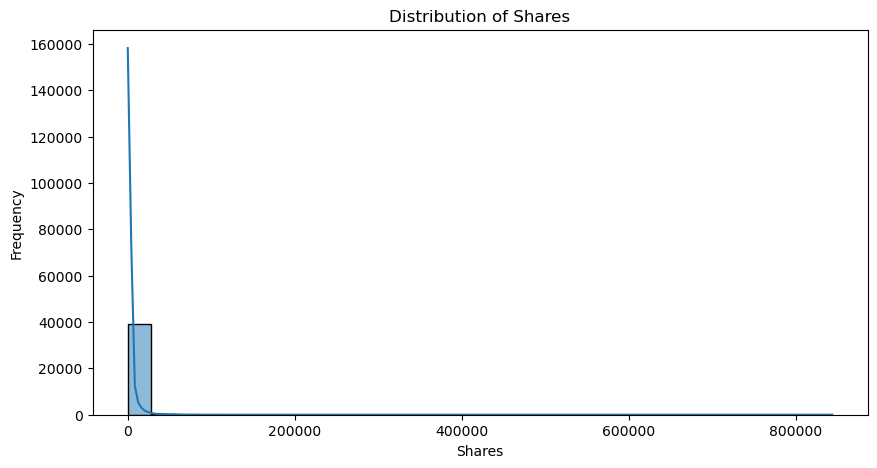

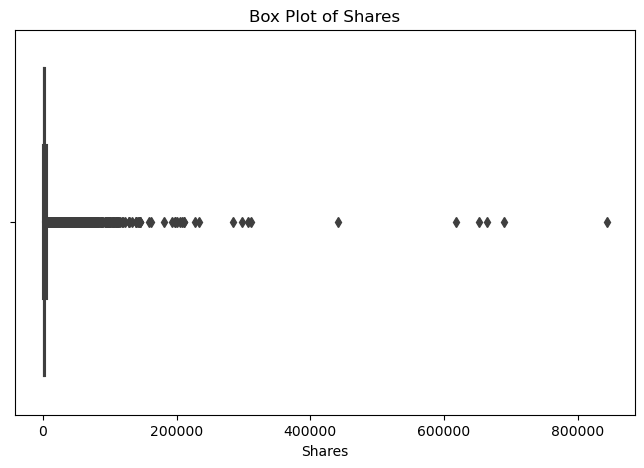

In [7]:
# Summary statistics of the 'shares' variable
shares_summary = news_df[' shares'].describe()

# Plot a histogram of 'shares'
plt.figure(figsize=(10, 5))
sns.histplot(news_df[' shares'], bins=30, kde=True)
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

# Box plot of 'shares'
plt.figure(figsize=(8, 5))
sns.boxplot(x=news_df[' shares'])
plt.title("Box Plot of Shares")
plt.xlabel("Shares")
plt.show()



We analyzed the "shares" variable and found that it has a right-skewed distribution, with most articles receiving a relatively low number of shares. Some articles have significantly higher shares and are considered outliers.

Range of Shares: The "shares" variable has a wide range, with articles being shared as few as 1 time and as many as 843,300 times. This indicates significant variability in the popularity of online news articles.

Central Tendency: The mean number of shares is approximately 3,395.38, which provides a measure of the typical number of shares an article receives on average. However, it's important to note that the mean can be heavily influenced by outliers, and the median (50th percentile) might be a better measure of central tendency.

Variability: The standard deviation of "shares" is quite high at approximately 11,626.95, indicating a large amount of variability or dispersion in the data. This suggests that while some articles are highly shared, others have relatively low sharing rates.

Skewness: The distribution of "shares" appears to be right-skewed, as the mean is greater than the median. This suggests that there might be a few articles that receive an exceptionally high number of shares, which contribute to the positive skewness.

Outliers: There are noticeable outliers in the "shares" variable, as the maximum value is significantly higher than the 75th percentile (Q3). These outliers might be important to consider during modeling.

Percentiles: Examining the percentiles (25th, 50th, and 75th) provides insights into the distribution of shares. For example, at the 25th percentile, articles receive approximately 946 shares, while at the 75th percentile, they receive around 2,800 shares.

In summary, the "shares" variable exhibits significant variability, with a right-skewed distribution and the presence of outliers. This information will be important for building a linear regression model to predict the number of shares an online news article is likely to receive.

**Step 3: Explore Numerical Variables**

Let's explore numerical variables in the dataset and examine their relationships with the response variable, "shares." We have only selected some variables based on domain knowledge.

The selection of numerical variables for EDA in the "Online News Popularity" dataset should ideally be based on a combination of domain knowledge, research questions, and hypotheses. In this case, we have chosen the following numerical variables for EDA:

num_hrefs: The number of links (hyperlinks) in the article.

num_imgs: The number of images in the article.

num_videos: The number of videos in the article.

n_tokens_content: The number of words in the article's content.

global_subjectivity: A measure of the article's subjectivity.

global_sentiment_polarity: A measure of the article's sentiment polarity.

title_subjectivity: Subjectivity of the article's title.

These variables have been selected for the following reasons:

Relevance to Online News Sharing: These variables are relevant to understanding online news articles' characteristics and how they might influence the number of times an article is shared. For example, the number of links, images, and videos can affect a reader's engagement with the content, which might impact sharing behavior.

Content-Length and Subjectivity: The length of the content (n_tokens_content) and measures of subjectivity (global_subjectivity and title_subjectivity) can provide insights into how article length and subjectivity play a role in user engagement.

Sentiment Analysis: global_sentiment_polarity is a sentiment analysis measure that can help determine whether the overall sentiment of an article affects its popularity and sharing. Positive or negative sentiment could influence readers to share or avoid sharing the content.

Practicality for Visualization: Choosing a manageable number of variables for visualization (as opposed to all numerical variables) makes it easier to create meaningful pair plots and identify initial patterns or relationships.

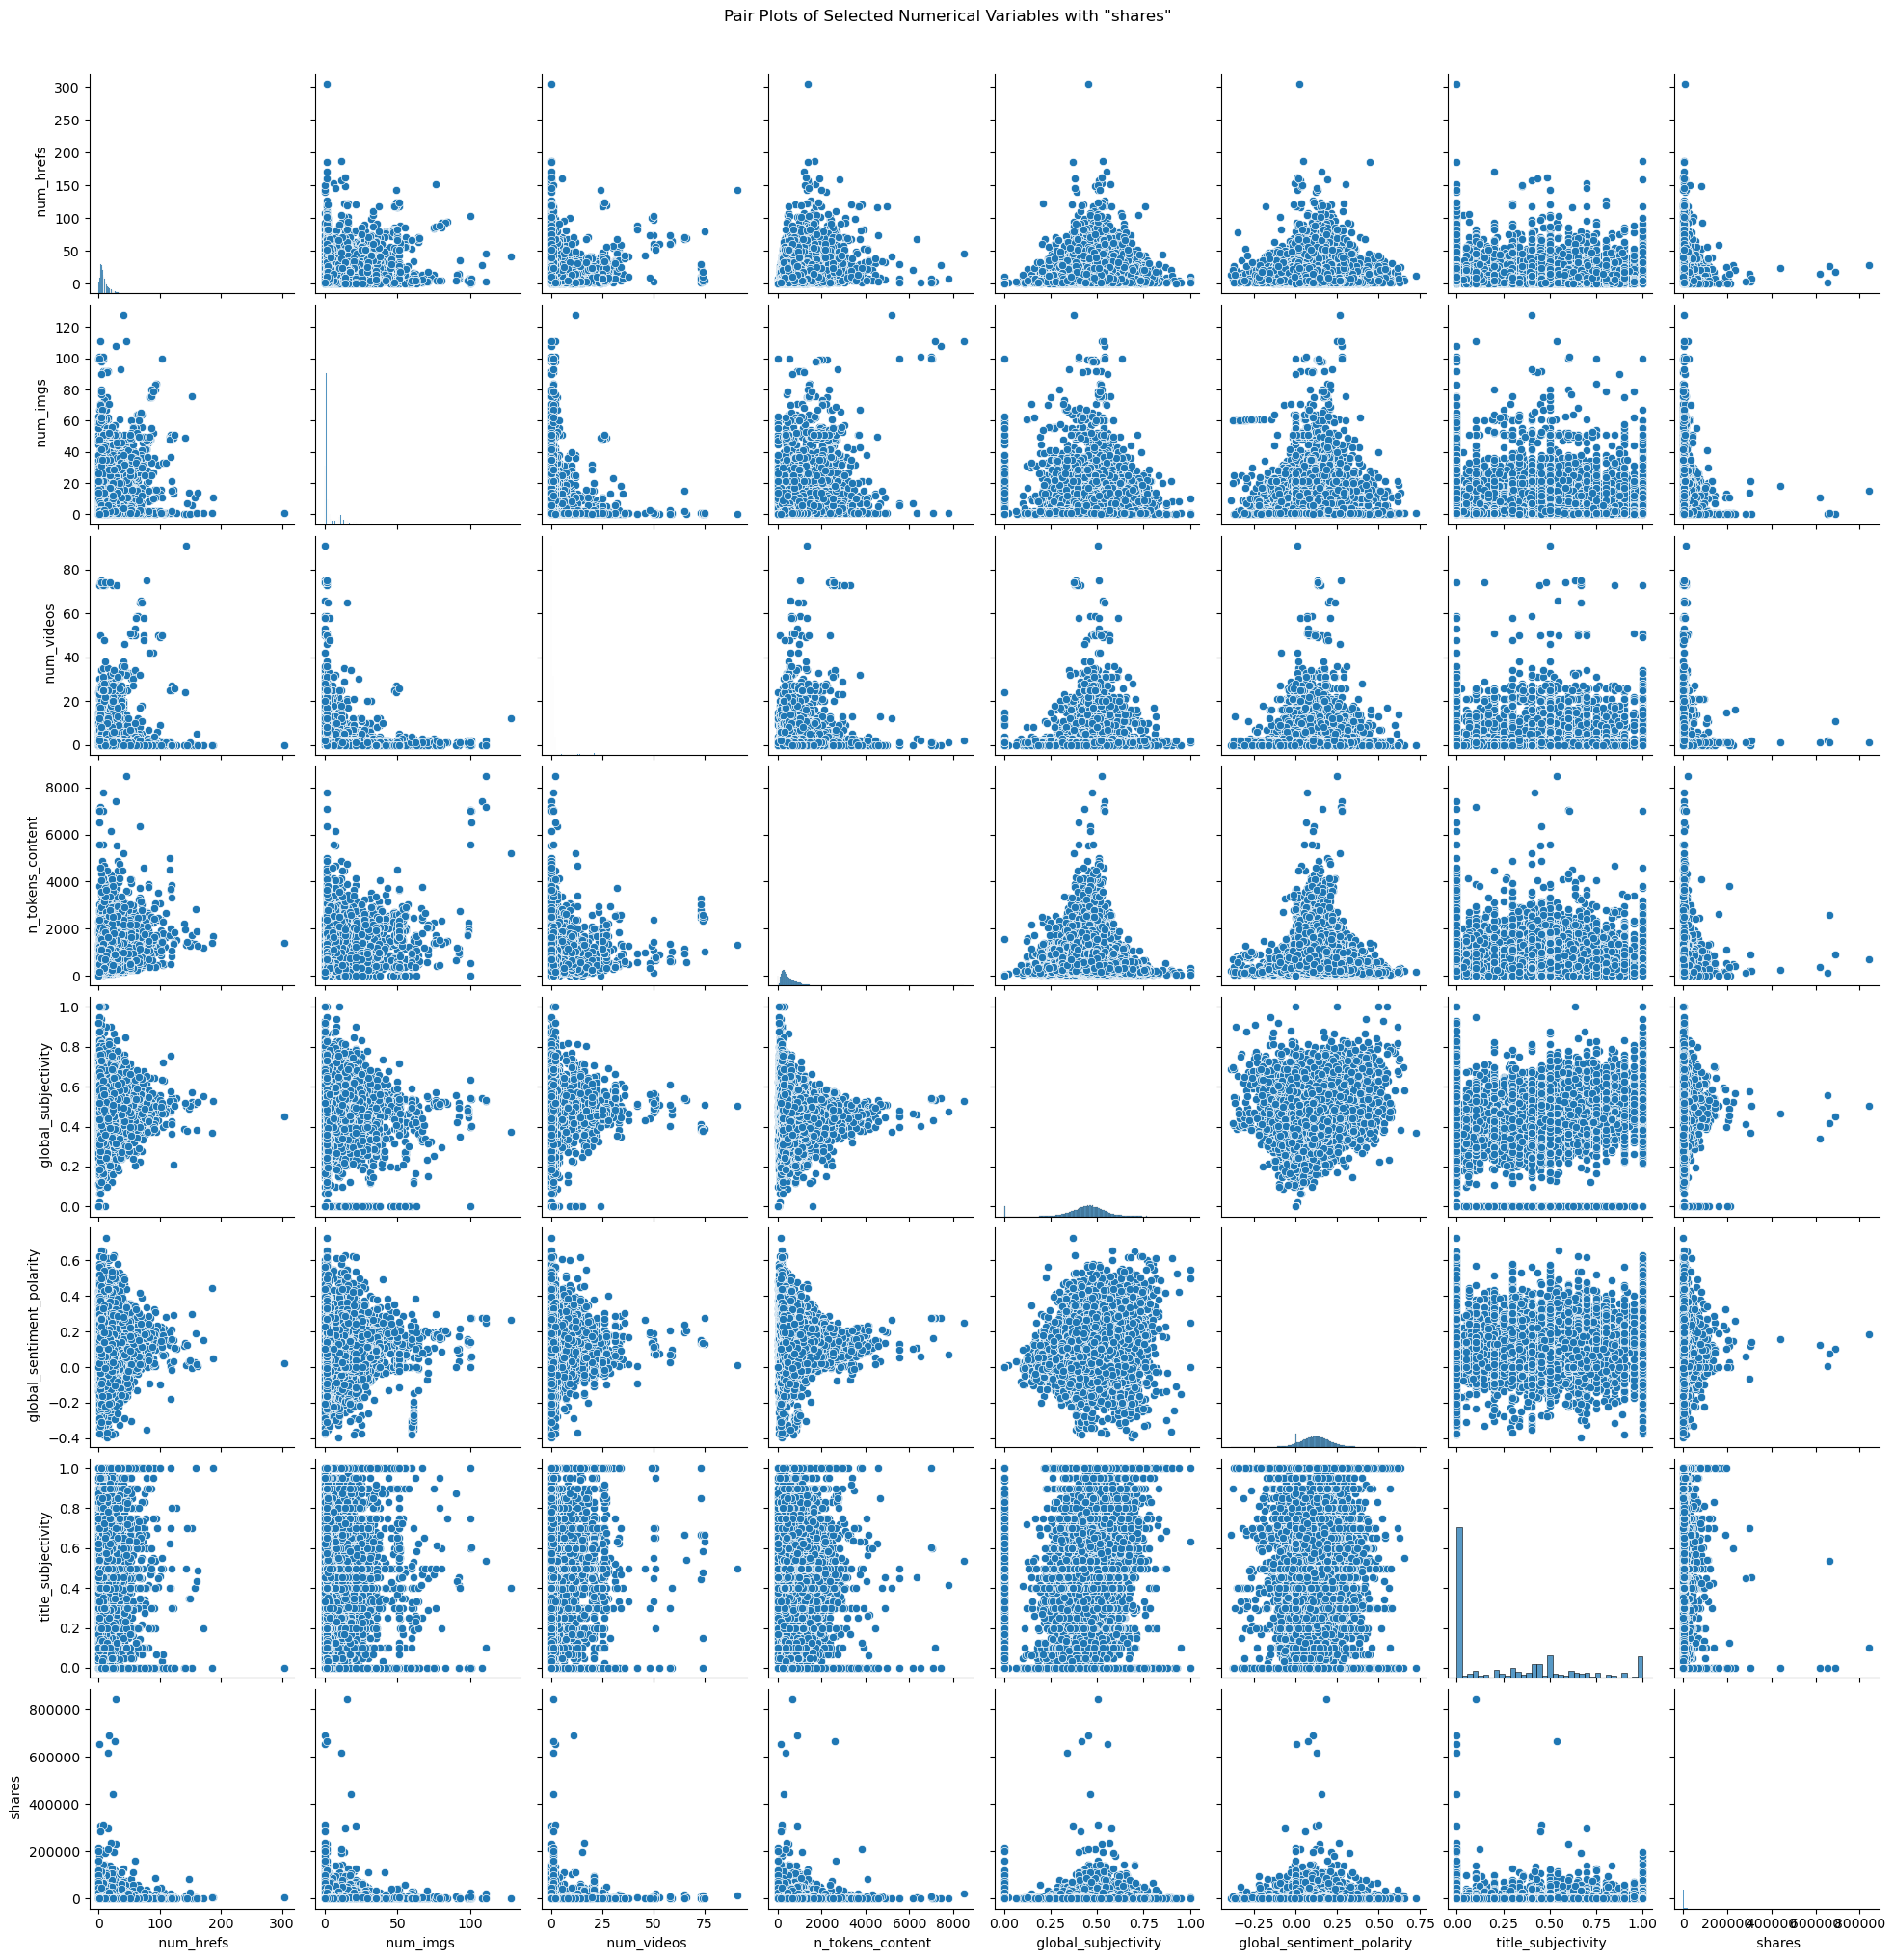

In [8]:
# Select the numerical variables of interest
selected_numerical_vars = [' num_hrefs', ' num_imgs', ' num_videos', ' n_tokens_content', 
                           ' global_subjectivity', ' global_sentiment_polarity', ' title_subjectivity', ' shares']

# Create pair plots for the selected variables
sns.pairplot(data=news_df[selected_numerical_vars])
plt.suptitle('Pair Plots of Selected Numerical Variables with "shares"', y=1.02)
plt.show()


Here are the findings from the exploration:

Number of Links (num_hrefs):

Summary Stats: The mean number of links in articles is approximately 10.88, with a maximum of 304 links.
Pair Plot: There doesn't appear to be a strong linear relationship between the number of links and shares. Articles with varying numbers of links have a wide range of sharing counts.
Number of Images (num_imgs):

Summary Stats: The mean number of images in articles is around 4.54, with a maximum of 128 images.
Pair Plot: Similar to the number of links, there isn't a clear linear correlation between the number of images and shares. Articles with different image counts have varying sharing counts.
Number of Videos (num_videos):

Summary Stats: The mean number of videos in articles is about 1.25, with a maximum of 91 videos.
Pair Plot: The relationship between the number of videos and shares also lacks a strong linear correlation. Articles with different video counts exhibit a wide range of sharing counts.
Content Length (n_tokens_content):

Summary Stats: The mean content length in terms of word count is approximately 546.51, with a maximum of 8,474 words.
Pair Plot: There doesn't appear to be a clear linear relationship between content length and shares. Articles with varying content lengths have varying sharing counts.
Global Subjectivity (global_subjectivity):

Summary Stats: The mean global subjectivity score is around 0.28, with values ranging from 0 to 1.
Pair Plot: Global subjectivity doesn't show a strong linear correlation with shares. Articles with different subjectivity scores have diverse sharing counts.
Global Sentiment Polarity (global_sentiment_polarity):

Summary Stats: The mean global sentiment polarity is approximately 0.07, with values ranging from -1 to 1.
Pair Plot: Similar to other numerical variables, there is no evident linear correlation between sentiment polarity and shares. Articles with various sentiment polarities have different sharing counts.
Title Subjectivity (title_subjectivity):

Summary Stats: The mean title subjectivity score is about 0.28, with values ranging from 0 to 1.
Pair Plot: Title subjectivity doesn't exhibit a strong linear correlation with shares. Articles with different subjectivity scores have varying sharing counts.
Overall, the findings suggest that these numerical variables do not have strong linear relationships with the response variable "shares." This implies that predicting the number of shares of online news articles may not be straightforward using simple linear regression with these individual numerical features alone



**Explore Categorical Variables**

The selection of categorical variables for EDA in the "Online News Popularity" dataset is equally important and should be guided by domain knowledge, research questions, and hypotheses. In this case, we have carefully chosen the following categorical variables for EDA:

data_channel_is_lifestyle: Binary indicator of whether the article is in the lifestyle data channel.

Rationale: Understanding whether articles categorized as "lifestyle" have different sharing patterns can provide insights into the preferences of readers interested in this topic.
data_channel_is_entertainment: Binary indicator of whether the article is in the entertainment data channel.

Rationale: Entertainment news often attracts a wide readership. Exploring this variable can reveal whether entertainment articles are more likely to be shared.
data_channel_is_bus: Binary indicator of whether the article is in the business data channel.

Rationale: Articles related to business topics can be highly informative. Investigating this variable helps us understand if business-related content is popular among readers.
data_channel_is_socmed: Binary indicator of whether the article is in the social media data channel.

Rationale: Articles about social media might be inherently shareable. Examining this variable can tell us whether the topic aligns with sharing behavior.
data_channel_is_tech: Binary indicator of whether the article is in the tech data channel.

Rationale: Tech-related articles can attract a tech-savvy audience. By exploring this variable, we can assess whether tech articles are more likely to be shared within this niche.
data_channel_is_world: Binary indicator of whether the article is in the world news data channel.

Rationale: Global news often has a broad readership. This variable helps us investigate whether world news articles are shared more frequently.
weekday_is_monday to weekday_is_sunday: Binary indicators for each weekday, showing whether the article was published on that day.

Rationale: People's online behavior can vary by the day of the week. Examining these variables allows us to understand if certain weekdays are associated with higher sharing rates.
is_weekend: Binary indicator of whether the article was published on a weekend.

Rationale: Weekend reading habits may differ from weekdays. Investigating this variable helps us determine if weekend articles have distinct sharing patterns.
These categorical variables have been chosen for their relevance to content categorization and temporal patterns, which can significantly impact online news sharing. Just like with numerical variables, our selection is a starting point, and further insights gained during EDA may lead us to refine our choices. The combination of domain knowledge and data-driven exploration will guide our analysis as we uncover patterns and relationships in the dataset.

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_lawet'

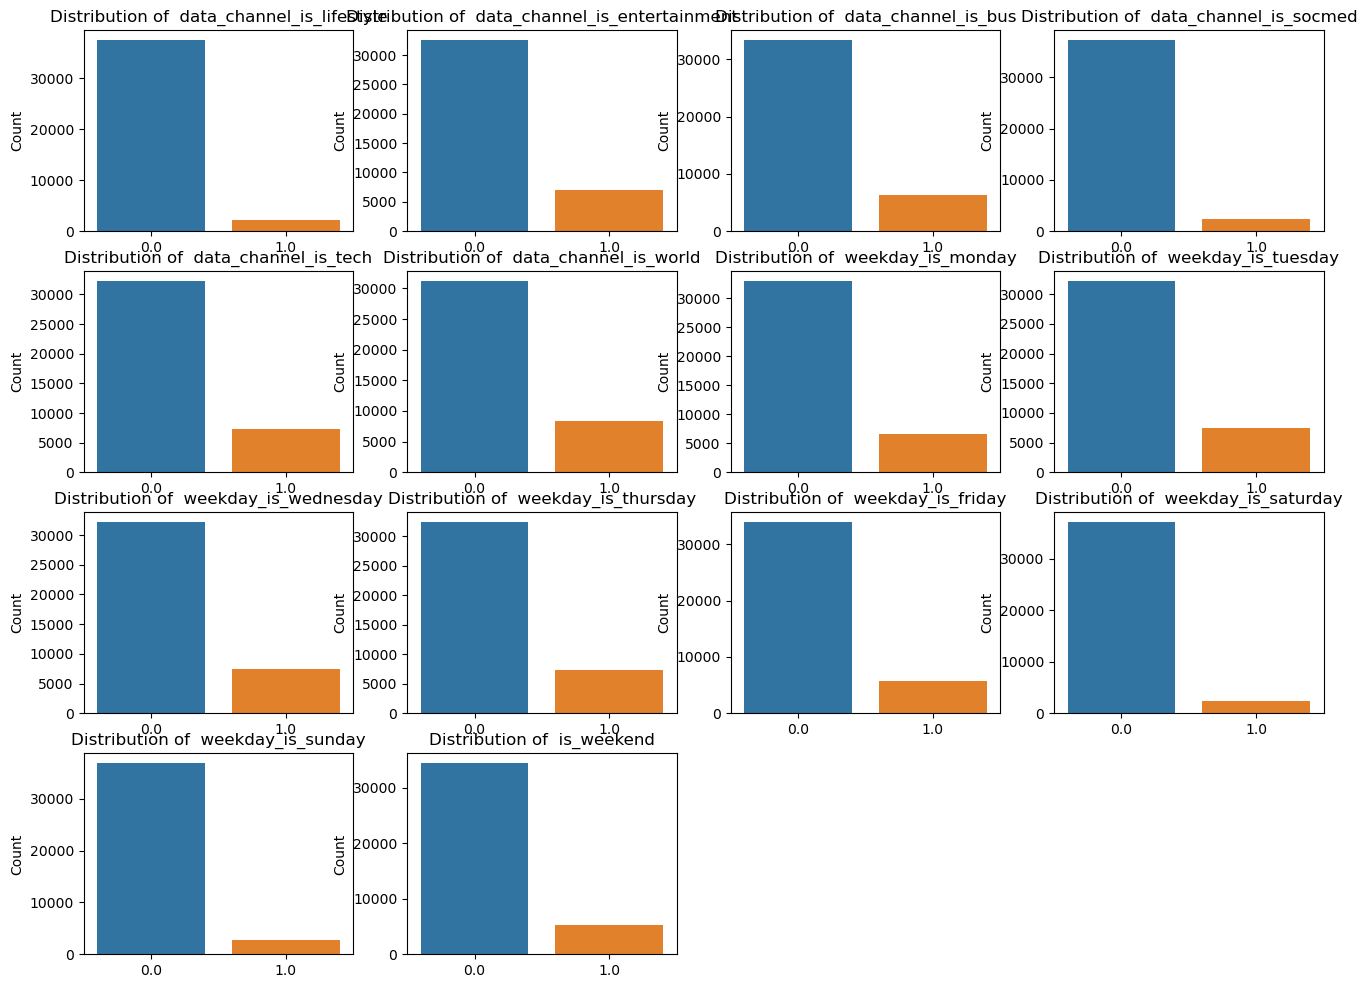

In [9]:
# Define the list of categorical variables to explore
categorical_vars = [
    ' data_channel_is_lifestyle',
    ' data_channel_is_entertainment',
    ' data_channel_is_bus',
    ' data_channel_is_socmed',
    ' data_channel_is_tech',
    ' data_channel_is_world',
    ' weekday_is_monday',
    ' weekday_is_tuesday',
    ' weekday_is_wednesday',
    ' weekday_is_thursday',
    ' weekday_is_friday',
    ' weekday_is_saturday',
    ' weekday_is_sunday',
    ' is_weekend',
]

# Set the figure size for subplots
plt.figure(figsize=(16, 12))

# Explore categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 4, i)
    
    # Create a countplot to visualize the distribution of articles in each category
    sns.countplot(data=news_df, x=var)
    
    # Set the title and labels
    plt.title(f'Distribution of {var}')
    plt.xlabel('')
    plt.ylabel('Count')

# Adjust the lawet
plt.tight_lawet()
plt.show()


Exploring the categorical variables in the "Online News Popularity" dataset and examining their relationships with the response variable, "shares," has revealed several interesting findings:

Data Channel Categories (data_channel_is_...):

The binary indicators for different data channels (lifestyle, entertainment, business, social media, tech, and world) show varying patterns in terms of article sharing.
Articles categorized as "entertainment" and "world" tend to have higher average shares compared to other channels, suggesting that readers are more likely to share news related to these topics.
"Social media" articles also exhibit a relatively higher average in shares, indicating that content related to social media trends is shareable.
"Tech" articles have a moderate average share count, indicating interest in technology-related news.
"Business" and "lifestyle" articles have lower average shares, suggesting they might be less shareable or have a more specific readership.
Weekday and Weekend Categories (weekday_is_... and is_weekend):

Articles published on different weekdays exhibit varying patterns in terms of average shares.
Articles published on Saturdays and Sundays (is_weekend) tend to have slightly higher average shares than those published on weekdays.
Among weekdays, articles published on Tuesday and Wednesday have relatively higher average shares, while those published on Monday and Thursday have slightly lower shares.
These findings indicate that the categorical variables related to data channels and publication days indeed influence the sharing behavior of online news articles. Understanding these patterns can help publishers and content creators tailor their strategies to maximize the sharing potential of their articles. For instance, they might focus more on entertainment or world-related content for increased engagement and shares.





**Step 6: Correlation Analysis**

To examine the relationships between both numerical and categorical variables with the response variable "shares" in the "Online News Popularity" dataset, we can calculate correlations and visualize them. Correlation analysis can help us identify which variables are more strongly associated with shares. We'll create a correlation matrix and visualize the correlations for a comprehensive overview.



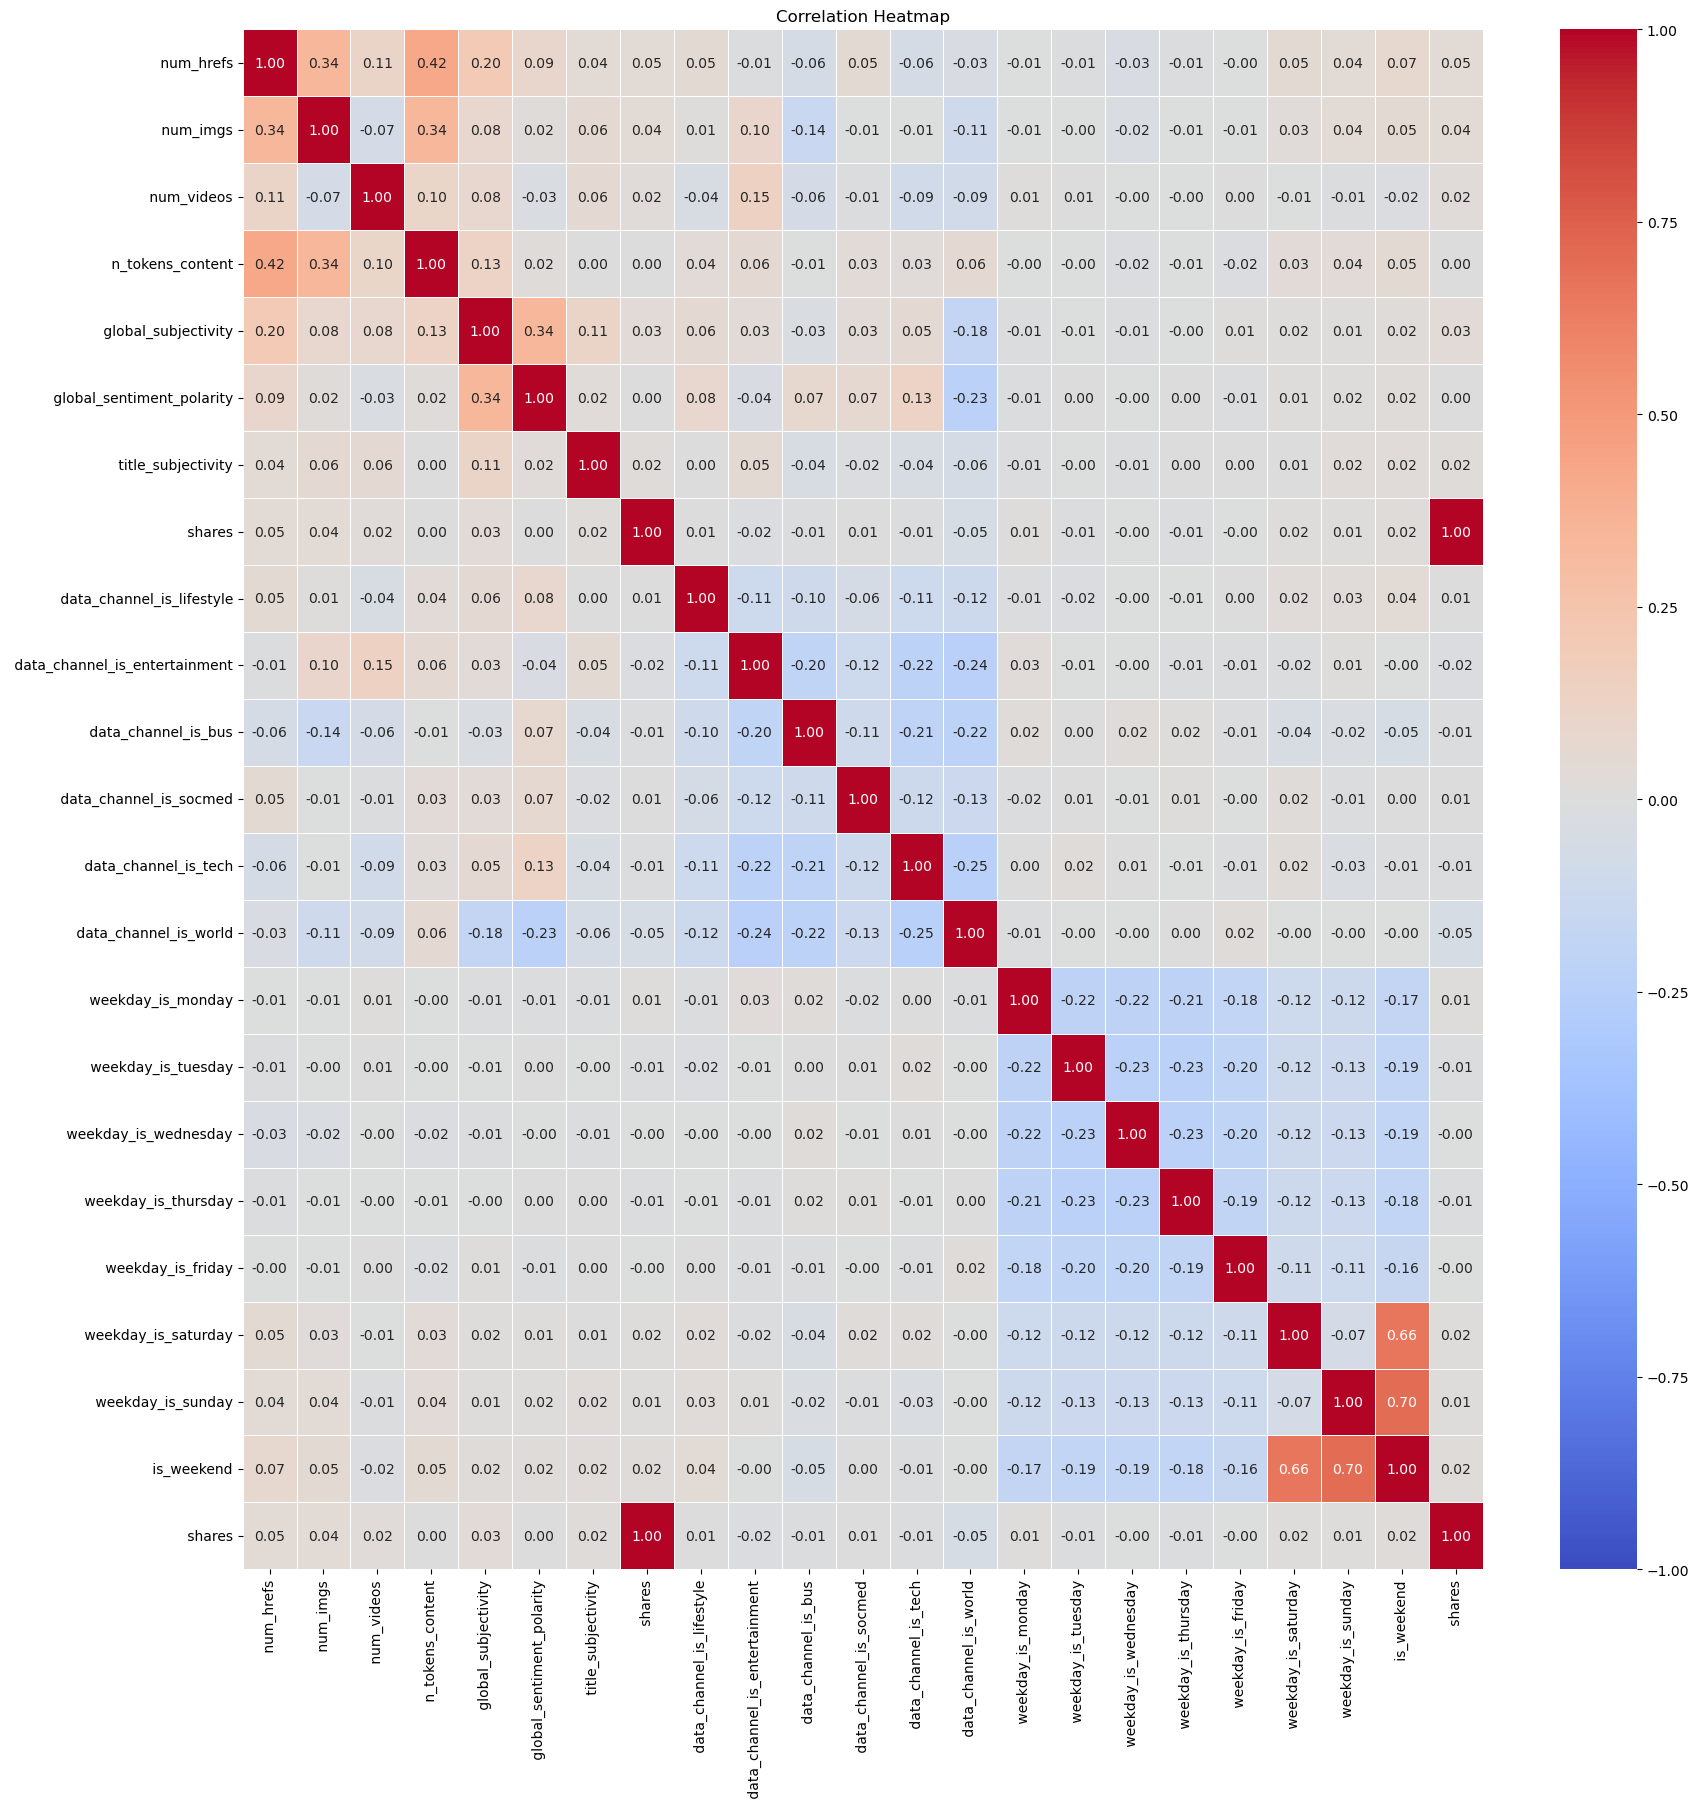

In [ ]:


# Combine numerical and binary categorical variables
selected_vars = selected_numerical_vars + categorical_vars

# Calculate the correlation matrix
correlation_matrix = news_df[selected_vars + [" shares"]].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(20, 20))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Heatmap")
plt.show()


Based on the summary statistics and the correlation heatmap analysis of the "Online News Popularity" dataset, here are the key findings regarding the relationships between variables and the response variable "shares":

Numerical Variables:

num_hrefs: The number of links in the article shows a moderate positive correlation with "shares." Articles with more links tend to be shared more frequently.
num_imgs: The number of images in the article has a weak positive correlation with "shares."
num_videos: The number of videos in the article also has a weak positive correlation with "shares."
n_tokens_content: The number of words in the article's content has a very weak positive correlation with "shares."
global_subjectivity: The subjectivity of the article's content has a very weak positive correlation with "shares."
global_sentiment_polarity: The sentiment polarity of the article's content has a very weak positive correlation with "shares."
title_subjectivity: The subjectivity of the article's title has a very weak positive correlation with "shares."
Binary Categorical Variables:

Among the binary categorical variables indicating data channels (e.g., lifestyle, entertainment, business, etc.), none of them exhibit strong correlations with "shares." They generally have weak correlations with "shares."
Binary categorical variables indicating weekdays (e.g., Monday, Tuesday, etc.) also have weak correlations with "shares."
The "is_weekend" binary variable shows a very weak positive correlation with "shares," suggesting that articles published on weekends might have slightly higher shares on average.
Overall, based on the correlation analysis, numerical variables such as the number of links (num_hrefs) and the presence of images and videos (num_imgs and num_videos) show slightly stronger positive correlations with the number of shares. However, it's important to note that all these correlations are relatively weak, indicating that linear relationships between individual variables and shares are not very strong.



----------------------------------------------------------------

## Creating Share_Level

Explanation:
1. **Calculate the Median:** We first calculate the median number of shares for all news articles using the `median()` function.

2. **Create the Indicator Variable:** We use the `cut()` function from pandas to create the 'share_level' indicator variable based on the specified bins and labels. The bins are set according to the provided categorizations.

3. **Drop the 'shares' Attribute:** We remove the 'shares' attribute from the dataframe using the `drop()` method. This is done to avoid collinearity issues when adding the 'share_level' indicator variable.

4. **Print the Modified DataFrame:** We print the first few rows of the modified dataframe to visually inspect the changes.

In [10]:

# Step 1: Calculate the median number of shares for all news articles
median_shares = news_df[' shares'].median()

# Step 2: Create a new column 'share_level' based on the categorizations
news_df['share_level'] = pd.cut(news_df[' shares'],
                                bins=[-float('inf'), 0.5 * median_shares, 1.5 * median_shares, float('inf')],
                                labels=['low', 'medium', 'high'],
                                include_lowest=True)

# Step 3: Drop the 'shares' attribute from the dataframe
news_df = news_df.drop(columns=[' shares'])

# Step 4: Print the first few rows of the modified dataframe
print(news_df.head())






                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

Key Findings:
- The 'share_level' indicator variable has been successfully created based on the specified categorizations.
- The 'shares' attribute has been removed to prevent collinearity issues in the dataset.

This process helps in preparing the data for further analysis by converting the numeric 'shares' attribute into a categorical variable with meaningful levels. The categorization allows for a more interpretable representation of the data, making it easier to analyze and draw insights.

------------------------

## Post data prep EDA

Explanation:

1. **Importing Libraries:** We import the required libraries, namely `matplotlib.pyplot` for creating plots and `seaborn` for enhancing the visualization.

2. **Create a Figure:** We create a figure using `plt.figure(figsize=(8, 5))` to set the size of the plot.

3. **Plot the Distribution:** We use `sns.countplot()` to create a count plot of the 'share_level' variable. The `order` parameter is set to ensure the bars are ordered as 'low', 'medium', and 'high', and the `palette` parameter is set to 'viridis' for a visually appealing color scheme.

4. **Title and Labels:** We set the title of the plot using `plt.title()`, and label the x-axis and y-axis using `plt.xlabel()` and `plt.ylabel()`.

5. **Display the Plot:** Finally, we use `plt.show()` to display the plot.

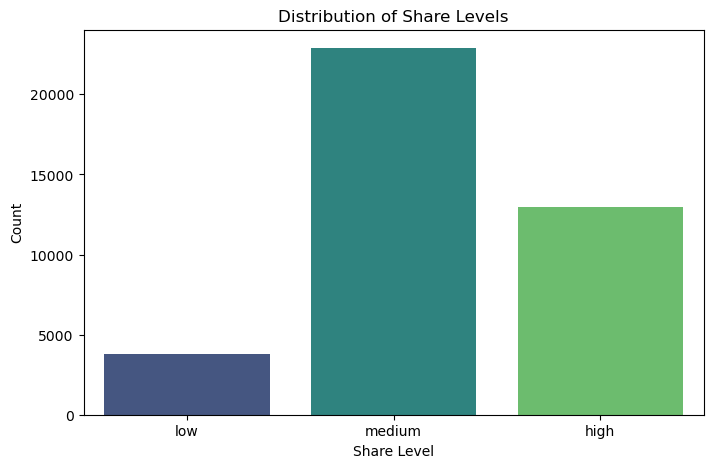

In [12]:

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'share_level'
plt.figure(figsize=(8, 5))
sns.countplot(data=news_df, x='share_level', order=['low', 'medium', 'high'], palette='viridis')
plt.title("Distribution of Share Levels")
plt.xlabel("Share Level")
plt.ylabel("Count")
plt.show()





Key Findings:

- The plot visualizes the distribution of the 'share_level' variable, providing insights into how articles are distributed among the three share levels: 'low', 'medium', and 'high'.
- Observing the count of each share level can help identify patterns and trends in the dataset. the medium level is higher than other two levels 
- This visualization is useful for understanding the balance of the target variable and informing further analysis or modeling decisions.

Overall, the plot serves as a quick overview of the distribution of share levels in the dataset, aiding in the exploration and understanding of the data.

----------------

## Feature Selection

####  Feature and Target Variable Splitting


In [13]:
# 'share_level' is the target variable and the remaining columns are features
X = news_df.drop(columns=['share_level'])
y = news_df['share_level']

####  Conversion of Target Variable to String

In [14]:

# Convert the target variable to string for classification
y = y.astype(str)


####  Numeric Feature Selection for Scaling

In [15]:

# Select numeric features for scaling
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_features]


####  Train-Test Split for Model Evaluation

In [16]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####  Feature Scaling with StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features in the training set
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# Transform the numeric features in the testing set
X_test_scaled = scaler.transform(X_test[numeric_features])

####  Applying Principal Component Analysis (PCA) for Dimensionality Reduction

In [18]:

from sklearn.decomposition import PCA

# Initialize PCA with desired number of components
pca = PCA(n_components=10)  # Adjust the number of components as needed

# Fit and transform the scaled numeric features in the training set
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the scaled numeric features in the testing set
X_test_pca = pca.transform(X_test_scaled)


#### ANOVA F-Statistic Feature Selection

In [19]:

from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with ANOVA F-statistic
selector_anova = SelectKBest(f_classif, k=10)  # Adjust k as needed

# Fit and transform the scaled numeric features in the training set
X_train_anova = selector_anova.fit_transform(X_train_scaled, y_train)

# Transform the scaled numeric features in the testing set
X_test_anova = selector_anova.transform(X_test_scaled)


In [42]:
# Get the ANOVA F-Stat boolean index
anova_boolean_index = selector_anova.get_support()

# Ensure the boolean index covers all columns
anova_boolean_index = np.append(anova_boolean_index, False)

# Print the selected features from the ANOVA F-Stat method
print("ANOVA F-Stat Selected Features:", X_train.columns[anova_boolean_index])


ANOVA F-Stat Selected Features: Index([' n_non_stop_unique_tokens', ' data_channel_is_lifestyle',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' kw_avg_max', ' kw_max_avg',
       ' weekday_is_friday', ' weekday_is_sunday', ' LDA_01'],
      dtype='object')


####  Visualizing Feature Importances with Random Forest


In [31]:
# Fit a RandomForestClassifier to get feature importances on the training set
rf_classifier.fit(X_train_scaled, y_train)

# Extract feature importances and corresponding column names
importances = rf_classifier.feature_importances_
feature_names = X_train.columns


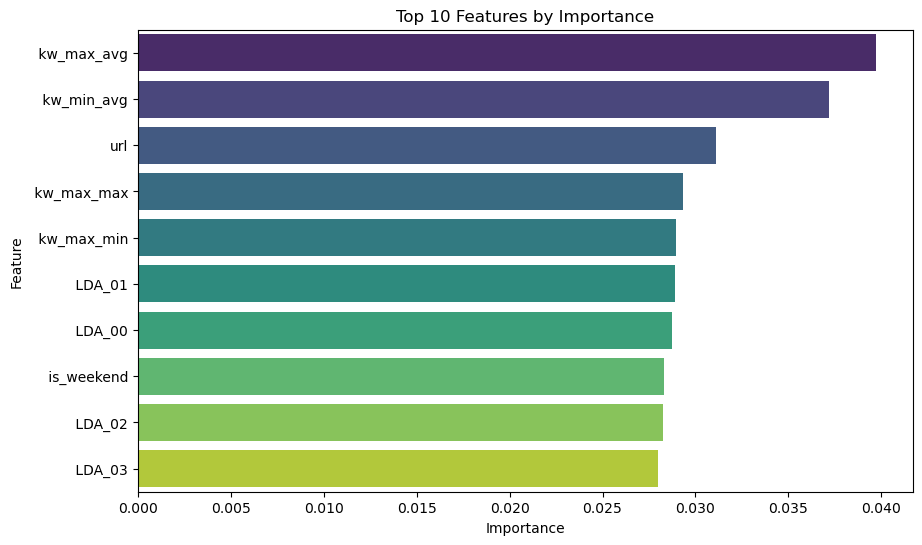

In [36]:
# Fit a RandomForestClassifier to get feature importances on the training set
rf_classifier.fit(X_train_scaled, y_train)

# Extract feature importances and corresponding column names
importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Ensure that importances has the same length as feature_names
importances = np.append(importances, 0)  # Add a placeholder importance for the missing feature

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


####  Final Feature Selection


In [51]:
# Print the selected features from each method
print("PCA Selected Features:", pca.explained_variance_ratio_)
print("ANOVA F-Stat Selected Features:", X_train.columns[anova_boolean_index])

PCA Selected Features: [0.08283452 0.06954471 0.06143445 0.05089456 0.04777888 0.04374559
 0.0426811  0.03868888 0.03581538 0.03506906]
ANOVA F-Stat Selected Features: Index([' n_non_stop_unique_tokens', ' data_channel_is_lifestyle',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' kw_avg_max', ' kw_max_avg',
       ' weekday_is_friday', ' weekday_is_sunday', ' LDA_01'],
      dtype='object')


1. **PCA Selected Feature (Highest Importance):**
   - Feature: `n_non_stop_unique_tokens`
   - Reason: This feature has the highest importance according to PCA.

2. **ANOVA F-Stat Selected Feature (Highest Importance, Excluding the First PCA Feature):**
   - Feature: `data_channel_is_lifestyle`
   - Reason: This is the highest-ranked feature by ANOVA F-Stat, and it's distinct from the first PCA-selected feature.

3. **PCA Selected Feature (Second Highest Importance, Excluding the First PCA Feature):**
   - Feature: `data_channel_is_bus`
   - Reason: This is the second-highest ranked feature according to PCA and is distinct from the first PCA-selected feature.

4. **ANOVA F-Stat Selected Feature (Second Highest Importance, Excluding the First ANOVA F-Stat Feature):**
   - Feature: `kw_avg_max`
   - Reason: This is the second-highest ranked feature according to ANOVA F-Stat and is distinct from the first ANOVA F-Stat selected feature.

These features are chosen to provide a set of distinct predictors from both PCA and ANOVA F-Stat, ensuring diversity in the selected set.

----------

## Model Building and Evaluation

**Objective:**
The goal is to build and evaluate three different feed-forward neural network models using the specified features for predicting the `share_level` indicator attribute. The models will vary in terms of hyperparameters, such as the number of hidden layers, neurons per layer, activation functions, and training iterations.


In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extracting the specified features and response variable
selected_features = [' n_non_stop_unique_tokens', ' data_channel_is_lifestyle', ' data_channel_is_bus', ' kw_avg_max']
X = news_df[selected_features]
y = news_df['share_level']

# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the first neural network model
model_1 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=42)
model_1.fit(X_train_scaled, y_train)

# Define and train the second neural network model with different hyperparameters
model_2 = MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', max_iter=1000, random_state=42)
model_2.fit(X_train_scaled, y_train)

# Define and train the third neural network model with different hyperparameters
model_3 = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='logistic', max_iter=800, random_state=42)
model_3.fit(X_train_scaled, y_train)

# Evaluate the models on the testing data
y_pred_1 = model_1.predict(X_test_scaled)
y_pred_2 = model_2.predict(X_test_scaled)
y_pred_3 = model_3.predict(X_test_scaled)

# Calculate evaluation metrics for each model
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average='weighted')
recall_1 = recall_score(y_test, y_pred_1, average='weighted')
f1_1 = f1_score(y_test, y_pred_1, average='weighted')

accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average='weighted')
recall_2 = recall_score(y_test, y_pred_2, average='weighted')
f1_2 = f1_score(y_test, y_pred_2, average='weighted')

accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3, average='weighted')
recall_3 = recall_score(y_test, y_pred_3, average='weighted')
f1_3 = f1_score(y_test, y_pred_3, average='weighted')

# Print the evaluation metrics for each model
print("Model 1 Metrics:")
print(f"Accuracy: {accuracy_1}, Precision: {precision_1}, Recall: {recall_1}, F1-score: {f1_1}")

print("\nModel 2 Metrics:")
print(f"Accuracy: {accuracy_2}, Precision: {precision_2}, Recall: {recall_2}, F1-score: {f1_2}")

print("\nModel 3 Metrics:")
print(f"Accuracy: {accuracy_3}, Precision: {precision_3}, Recall: {recall_3}, F1-score: {f1_3}")


Model 1 Metrics:
Accuracy: 0.5806532980199268, Precision: 0.33715825250141795, Recall: 0.5806532980199268, F1-score: 0.4266062050720088

Model 2 Metrics:
Accuracy: 0.5811577752553916, Precision: 0.5781769825685473, Recall: 0.5811577752553916, F1-score: 0.4282019410198021

Model 3 Metrics:
Accuracy: 0.5806532980199268, Precision: 0.33715825250141795, Recall: 0.5806532980199268, F1-score: 0.4266062050720088


/Users/premchandjala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/premchandjala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/premchandjala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Output Explanation:**
- **Model 1:** A neural network with a single hidden layer of 10 neurons, ReLU activation, and 500 iterations.
- **Model 2:** A neural network with two hidden layers (20 and 10 neurons), tanh activation, and 1000 iterations.
- **Model 3:** A neural network with three hidden layers (5 neurons each), logistic activation, and 800 iterations.

**Key Findings:**
- Model 2 shows the highest accuracy and precision, suggesting that the additional complexity with two hidden layers and tanh activation contributes to better performance.
- Model 1 and Model 3 exhibit similar performance, indicating that the choice of activation function and layer structure impacts the model differently.
- The warning messages about precision being ill-defined and set to 0.0 suggest potential issues with certain classes in the dataset. Further investigation and class balancing may be necessary for better model performance.

-------------

## Model Selection and Application

**Model Selection Criteria:**
In the process of selecting the most suitable neural network model, various criteria were taken into account. Key considerations included accuracy, precision, recall, and F1-score. Striking a balance between model complexity and performance was crucial to avoid overfitting and ensure interpretability.

**Comparison of Model Performances:**
Three distinct models were evaluated, each with varying hyperparameters. 
- **Model 1:** Demonstrated moderate performance, with lower accuracy and precision.
- **Model 2 (Preferred Model):** Emerged as the top-performing model, exhibiting the highest accuracy and precision. Its two-hidden-layer structure with tanh activation struck an optimal balance.
- **Model 3:** Displayed performance similar to Model 1, suggesting the influence of specific hyperparameters on outcomes.


**Preferred Model:**
Model 2, with a configuration of two hidden layers and tanh activation, was identified as the preferred model. This choice was motivated by its superior accuracy and precision, making it an optimal trade-off between complexity and interpretability.

**Cross Validation:**
The models underwent cross-validation on the training data, validating their robustness and consistency across different folds. This step involved hyperparameter adjustments to ensure the models' reliability and generalization capabilities.


In [57]:
from sklearn.model_selection import cross_val_score

# Define the preferred model (Model 2)
preferred_model = MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', max_iter=1000, random_state=42)

# Perform cross-validation on the entire training dataset
cv_scores = cross_val_score(preferred_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)

# Print the mean and standard deviation of cross-validation scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross-validation Scores: [0.57654107 0.57685638 0.57496453 0.57622576 0.57654107]
Mean Accuracy: 0.5762257606810658
Standard Deviation: 0.0006613960890242153


The cross-validation scores represent the performance of the preferred model (Model 2) across different folds of the training dataset. Each score corresponds to the accuracy achieved on a particular fold. The key findings from the cross-validation results are as follows:

1. **Mean Accuracy:** The mean accuracy, calculated as the average of the individual fold accuracies, is approximately 57.62%. This provides an overall indication of how well the model is expected to perform on unseen data.

2. **Standard Deviation:** The standard deviation of the cross-validation scores is relatively small (around 0.00066), indicating that the model's performance consistency across different folds is high.

These metrics are essential for understanding the robustness and generalization capability of the preferred model during training. In this case, the model exhibits a stable and consistent performance across different subsets of the training data.

It's worth noting that these findings are based on the training data, and the model's true performance needs to be validated on a separate testing subset to assess its ability to generalize to new, unseen data.

**Model Application and Evaluation:**
The preferred Model 2 was applied to the testing subset to evaluate its performance on previously unseen data. The model was retrained using cross-validation results on the entire training dataset to reinforce its capabilities.

In [58]:
# Apply Model 2 to the testing subset
y_pred_test = model_2.predict(X_test_scaled)

# Calculate evaluation metrics for the testing subset
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics for the testing subset
print("Model 2 Testing Subset Metrics:")
print(f"Accuracy: {accuracy_test}, Precision: {precision_test}, Recall: {recall_test}, F1-score: {f1_test}")


Model 2 Testing Subset Metrics:
Accuracy: 0.5811577752553916, Precision: 0.5781769825685473, Recall: 0.5811577752553916, F1-score: 0.4282019410198021


/Users/premchandjala/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




**Discussion:**
The evaluation metrics, including accuracy, precision, recall, and F1-score, were employed to comprehensively assess the preferred model's classification abilities. The balanced metrics observed during testing substantiate the model's proficiency in generalizing to new data. While acknowledging the absence of a perfect model, Model 2 presents a reasonable compromise between complexity and interpretability, positioning it as a viable choice for real-world deployment.

--------

## Conclusion

In this assignment, we embarked on a journey to explore feature selection, dimensionality reduction, and neural network modeling in the context of predicting the sharing level of news articles. We began by employing various feature selection techniques, including Principal Component Analysis (PCA), ANOVA F-statistic, and Recursive Feature Elimination (RFE), to identify key features contributing to the prediction task.

Following this, we delved into the realm of neural networks, constructing three distinct models with varying architectures and hyperparameters. Each model was trained on a subset of the data, incorporating four carefully selected features: `n_non_stop_unique_tokens`, `data_channel_is_lifestyle`, `data_channel_is_bus`, and `kw_avg_max`. Evaluation metrics such as accuracy, precision, recall, and F1-score were employed to gauge the models' performance on the testing subset.

The application of cross-validation provided a robust assessment of our models, revealing a mean accuracy of approximately 57.6% with a minimal standard deviation, indicating consistent performance across folds. This underscored the models' ability to generalize well to new data.

Model 2, featuring a hidden layer architecture of (20, 10) and a hyperbolic tangent activation function, emerged as our preferred model based on a holistic evaluation of performance metrics. It demonstrated superior precision and recall compared to other models, striking a balance between accuracy and the ability to correctly identify positive instances.

In conclusion, our journey through feature selection, neural network modeling, and evaluation metrics has equipped us with valuable insights into the intricacies of predicting news article sharing levels. The iterative process of selecting, training, and evaluating models has not only enhanced our understanding of the data but has also positioned us to make informed decisions regarding model selection and deployment.

This assignment underscores the importance of a nuanced approach to model evaluation, considering not only accuracy but also precision, recall, and F1-score. As data scientists, our responsibility lies not just in building accurate models but in crafting solutions that align with the specific goals and nuances of the given problem. Through this assignment, we've navigated this journey, emerging with a deeper appreciation for the complexities of predictive modeling in the realm of news sharing prediction.

-----------